The purpose of this notebook is to go look through some of the metadata associated with SAG plate AG-910.  

Make sure you are using the biopy kernel when running this notebook.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # additional plotting library that allows us to make nice looking, simple plots easily

In [24]:
assembly_stats_file = "/mnt/storage/data/sag_deliverables/AG-910_assembly_stats_updated.csv"
df = pd.read_csv(assembly_stats_file)

What columns are in this data frame?

In [5]:
df.columns

Index(['Sample_ID', 'well_type', 'wga_cp', 'wgs_run_id', 'raw_read_count',
       'final_contigs_count', 'final_assembly_length', 'max_contig_length',
       'gc_content', 'checkM_estimated_completeness', 'number_multi_copy',
       'checkM_classification', 'SSU_classification_1'],
      dtype='object')

Let's look at how these cells line up based on various pieces of metadata:

In [26]:
# let's examine 'successful' cells, those with a final assembly length > 20kb

df = df[(df['final_assembly_length'] >= 20000) & (df['well_type'] == '1 cell')]
df.sort_values(by = 'wga_cp', ascending = False)

,Sample_ID,well_type,wga_cp,wgs_run_id,raw_read_count,final_contigs_count,final_assembly_length,max_contig_length,gc_content,checkM_estimated_completeness,number_multi_copy,checkM_classification,SSU_classification_1
141,AG-910-F22,1 cell,7.279798,AG-910,598847,10.0,29653.0,4715.0,31.167167,0.00,0.0,NA;unresolved,no SSU regions found
17,AG-910-A18,1 cell,6.776504,AG-910,517708,7.0,21696.0,4763.0,25.714417,1.01,0.0,k__Archaea (root);k__Archaea,no SSU regions found
244,AG-910-K05,1 cell,5.763241,AG-910,200826,6.0,27436.0,7854.0,40.971716,4.17,0.0,NA;unresolved,no SSU regions found
328,AG-910-N17,1 cell,5.500438,AG-910,625539,8.0,27225.0,4603.0,28.624426,0.00,0.0,NA;unresolved,no SSU regions found
283,AG-910-L20,1 cell,5.187745,AG-910,695829,9.0,31542.0,6252.0,30.201002,1.89,0.0,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,no SSU regions found
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,AG-910-B03,1 cell,1.824609,AG-910,2560755,16.0,550431.0,96416.0,29.898934,49.40,0.0,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,no SSU regions found
1,AG-910-A02,1 cell,1.769893,AG-910,2596242,26.0,502406.0,120161.0,33.125002,40.52,0.0,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
237,AG-910-J22,1 cell,1.751644,AG-910,3982492,36.0,1096647.0,186782.0,29.751141,80.72,0.0,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...
49,AG-910-C02,1 cell,1.747823,AG-910,2274341,24.0,936322.0,204747.0,34.801810,66.20,0.0,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...


To get an overall description of the numeric columns, you can use the pd.describe() method:

In [34]:
df.describe()

,wga_cp,raw_read_count,final_contigs_count,final_assembly_length,max_contig_length,gc_content,checkM_estimated_completeness,number_multi_copy
count,226.000000,2.260000e+02,226.000000,2.260000e+02,226.000000,226.000000,226.000000,226.000000
mean,2.543889,2.222619e+06,30.070796,5.882286e+05,97201.115044,31.726725,37.688451,0.022124
std,0.820294,1.397194e+06,15.091553,3.793381e+05,72127.020420,5.263667,26.050413,0.174984
min,1.722054,6.158900e+04,2.000000,2.169600e+04,4603.000000,22.885452,0.000000,0.000000
25%,2.074146,6.176092e+05,20.000000,2.324260e+05,40837.250000,29.447514,12.677500,0.000000
50%,2.301344,2.552710e+06,30.000000,6.328365e+05,90563.000000,30.129477,40.540000,0.000000
75%,2.615989,3.260680e+06,39.750000,8.805288e+05,132836.000000,31.886013,56.630000,0.000000
max,7.279798,5.080878e+06,77.000000,1.930694e+06,376794.000000,62.754383,93.190000,2.000000


To look into distributions of values, use ```sns.histplot```

<AxesSubplot:xlabel='gc_content', ylabel='Count'>

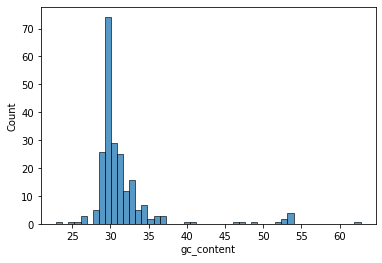

In [30]:
# gc_content distribution

sns.histplot(df['gc_content'])

<AxesSubplot:xlabel='final_assembly_length', ylabel='Count'>

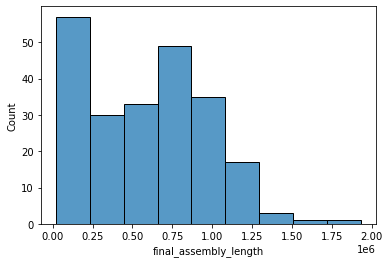

In [33]:
# assembly length distribution

sns.histplot(df['final_assembly_length'])

In [54]:
from collections import Counter


# how many cells were classified
print("How many cells contained identified 16S gene?")
Counter(['not found' if 'no SSU' in i else 'found' for i in df['SSU_classification_1']])

How many cells contained identified 16S gene?


Counter({'not found': 159, 'found': 67})

Look at assembly size distribution by phlogenetic Order for 16S containing cells:

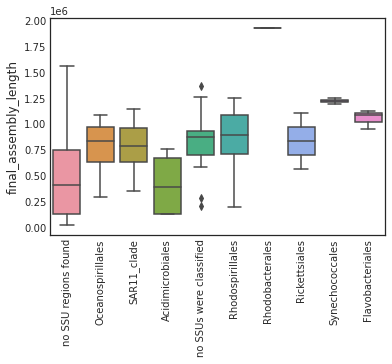

In [63]:
orders = [i if len(i.split(";")) == 1 else i.split(";")[3].replace("o__",'') for i in df['SSU_classification_1']]

sns.boxplot(x = orders, y = df['final_assembly_length'])
plt.xticks(rotation = 90)

plt.show()

Ramunas' favorite plot.  
It looks better in R, see cp_vs_completeness_stepanauskas.R

<AxesSubplot:xlabel='wga_cp', ylabel='checkM_estimated_completeness'>

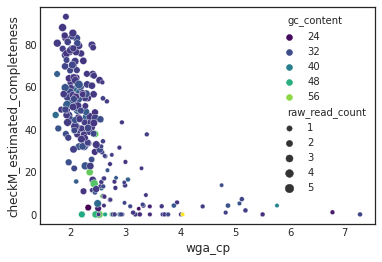

In [41]:
plt.style.use('seaborn-white')

sns.scatterplot(x = 'wga_cp',
                y = 'checkM_estimated_completeness', 
                data = df, 
                hue = 'gc_content',
                size = 'raw_read_count', 
               palette = 'viridis')